<a href="https://colab.research.google.com/github/HarinathReddyA/ACO/blob/master/servo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

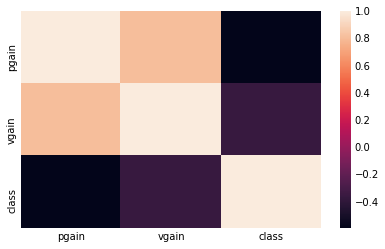

In [96]:
df  = pd.read_csv("servo.csv")
df.head()
sns.heatmap(df.corr())

# New Section

In [97]:
df.head(20)

,motor,screw,pgain,vgain,class
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251
5,E,C,4,3,0.806255
6,C,A,3,2,5.100014
7,A,A,3,2,5.700042
8,C,A,6,5,0.768754
9,D,A,4,1,1.031254


In [98]:
scale_mapper = {'E':5,'D':4,'C':3,'B':2,'A':1}
df['motor']=df['motor'].replace(scale_mapper)
print(df.iloc[20,0:4])

motor    5
screw    D
pgain    4
vgain    3
Name: 20, dtype: object


In [99]:
df['screw']=df['screw'].replace(scale_mapper)
vg = df['vgain']
vg = (vg/np.max(vg))/df['vgain'].std()
print(vg)

0      0.584006
1      0.730007
2      0.438004
3      0.292003
4      0.730007
         ...   
162    0.292003
163    0.146001
164    0.438004
165    0.292003
166    0.730007
Name: vgain, Length: 167, dtype: float64


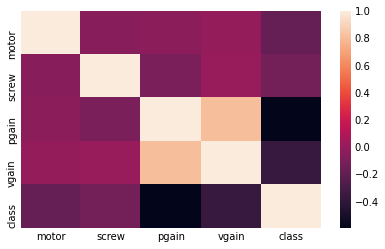

In [100]:
df.describe()
sns.heatmap(df.corr())

In [101]:
df_norm = df.iloc[:,0:5]-np.mean(df.iloc[:,0:5])/df.iloc[:,0:5].std()

In [102]:
df_norm.head()

,motor,screw,pgain,vgain,class
0,2.96215,3.04281,0.916869,2.146569,-0.609796
1,-0.03785,2.04281,1.916869,3.146569,-0.384795
2,1.96215,2.04281,-0.083131,1.146569,-0.534796
3,-0.03785,-0.95719,-1.083131,0.146569,4.608986
4,1.96215,0.04281,1.916869,3.146569,-0.534796


In [104]:
X = df_norm.iloc[:,0:4]
X.head()

,motor,screw,pgain,vgain
0,2.96215,3.04281,0.916869,2.146569
1,-0.03785,2.04281,1.916869,3.146569
2,1.96215,2.04281,-0.083131,1.146569
3,-0.03785,-0.95719,-1.083131,0.146569
4,1.96215,0.04281,1.916869,3.146569


In [105]:
Y = df.iloc[:,-1]
Y.head()


0    0.281251
1    0.506252
2    0.356251
3    5.500033
4    0.356251
Name: class, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X.values,Y.values,test_size = 0.05,random_state = 0)

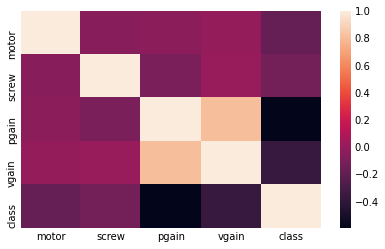

In [107]:
sns.heatmap(df.corr())

In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
y_pred = regressor.predict(x_test)
y_pred

array([1.52641518, 2.28460176, 1.77029917, 1.07057271, 1.53337352,
       3.00733528, 3.74227008, 1.28424658, 0.77256546])

In [110]:
print(regressor.coef_)

[-0.23954712 -0.25584056 -1.45766832  0.46951443]


In [111]:
print(regressor.intercept_)

1.6011062450768132


In [112]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6524990700344815

In [123]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly, y_train) 

lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
p_y_pred = lin2.predict(poly.fit_transform(x_test)) 
p_y_pred
                         

array([0.73881541, 0.79183879, 2.14726353, 0.38610378, 0.74642347,
       3.2811116 , 5.26701484, 0.63365367, 0.86616098])

In [124]:
r2_score(y_test,p_y_pred)

0.9146391613354283

Linear regression using single variable


In [119]:
print(df.iloc[:,0:])

     motor  screw  pgain  vgain     class
0        5      5      5      4  0.281251
1        2      4      6      5  0.506252
2        4      4      4      3  0.356251
3        2      1      3      2  5.500033
4        4      2      6      5  0.356251
..     ...    ...    ...    ...       ...
162      2      3      3      2  4.499986
163      2      5      3      1  3.699967
164      3      4      4      3  0.956256
165      1      2      3      2  4.499986
166      1      1      6      5  0.806255

[167 rows x 5 columns]


In [120]:
#Vector normalization
df_norm1 = df.iloc[:,0:]/np.sqrt(np.sum(df.iloc[:,0:]))

In [121]:
df_norm1.head()

,motor,screw,pgain,vgain,class
0,0.227980,0.230633,0.189797,0.194257,0.018462
1,0.091192,0.184506,0.227757,0.242821,0.033231
2,0.182384,0.184506,0.151838,0.145693,0.023385
3,0.091192,0.046127,0.113878,0.097129,0.361032
4,0.182384,0.092253,0.227757,0.242821,0.023385


In [135]:
X1 = df_norm1.iloc[:,0:4]
X1.head()

,motor,screw,pgain,vgain
0,0.227980,0.230633,0.189797,0.194257
1,0.091192,0.184506,0.227757,0.242821
2,0.182384,0.184506,0.151838,0.145693
3,0.091192,0.046127,0.113878,0.097129
4,0.182384,0.092253,0.227757,0.242821


In [136]:
Y1 = df_norm1.iloc[:,-1]
Y1.head()

0    0.018462
1    0.033231
2    0.023385
3    0.361032
4    0.023385
Name: class, dtype: float64

In [137]:
x_train,x_test,y_train,y_test = train_test_split(X1.values,Y1.values,test_size = 0.05,random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_pred

array([0.10019651, 0.14996518, 0.11620547, 0.07027423, 0.10065327,
       0.19740665, 0.24564903, 0.08430015, 0.05071252])

In [138]:
r2_score(y_test,y_pred)

0.6524990700344808

In [172]:
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly, y_train) 

lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
p_y_pred = lin2.predict(poly.fit_transform(x_test)) 
p_y_pred

array([0.00318343, 0.0034119 , 0.0092522 , 0.00166366, 0.00321622,
       0.01413777, 0.0226947 , 0.00273031, 0.00373214])

In [173]:
r2_score(y_test,p_y_pred)

0.9146391613365806

In [156]:
#min _ max norm
df_norm2 = (df.iloc[:,0:]-np.min(df.iloc[:,0:]))/(np.max(df.iloc[:,0:])-np.min(df.iloc[:,0:]))
df_norm2.head()

,motor,screw,pgain,vgain,class
0,1.00,1.00,0.666667,0.75,0.021524
1,0.25,0.75,1.000000,1.00,0.053811
2,0.75,0.75,0.333333,0.50,0.032287
3,0.25,0.00,0.000000,0.25,0.770396
4,0.75,0.25,1.000000,1.00,0.032287


In [157]:
X2 = df_norm2.iloc[:,0:4]
X2.head()
Y2 = df_norm2.iloc[:,-1]
Y2.head()

0    0.021524
1    0.053811
2    0.032287
3    0.770396
4    0.032287
Name: class, dtype: float64

In [160]:
x_train,x_test,y_train,y_test = train_test_split(X2.values,Y2.values,test_size = 0.05,random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_pred
r2_score(y_test,y_pred)

0.6524990700344815

In [175]:
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly, y_train) 

lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
p_y_pred = lin2.predict(poly.fit_transform(x_test)) 
p_y_pred
r2_score(y_test,p_y_pred)

0.8642202532907535

In [163]:
# Linear sum based normalization
df_norm3 =  df.iloc[:,0:]/np.sum(df.iloc[:,0:])
X3 = df_norm3.iloc[:,0:4]
X3.head()
Y3 = df_norm3.iloc[:,-1]
X3.head()

,motor,screw,pgain,vgain
0,0.010395,0.010638,0.007205,0.009434
1,0.004158,0.008511,0.008646,0.011792
2,0.008316,0.008511,0.005764,0.007075
3,0.004158,0.002128,0.004323,0.004717
4,0.008316,0.004255,0.008646,0.011792


In [165]:
x_train,x_test,y_train,y_test = train_test_split(X3.values,Y3.values,test_size = 0.05,random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_pred
r2_score(y_test,y_pred)

0.6524990700344817

In [174]:
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly, y_train) 

lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
p_y_pred = lin2.predict(poly.fit_transform(x_test)) 
p_y_pred
r2_score(y_test,p_y_pred)

0.8642202532907535